# EDA
## 1 load data

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
filter_for_stationary=True
threshold = 100

data_name = "noise_power0_narrow_grid"
sim_data = pd.read_csv(f"./data/raw/{data_name}.csv")
i= np.column_stack((sim_data["id"],sim_data["iq"]))
u = np.column_stack((sim_data["ud"][1:],sim_data["uq"][1:]))
psi = np.column_stack((sim_data["psi_d"],sim_data["psi_q"]))

noise_data_name = "simdata_sampling_6_per_PWM"
sim_data_noise = pd.read_csv(f"./data/raw/{noise_data_name}.csv")
i_noise= np.column_stack((sim_data_noise["id"],sim_data_noise["iq"]))
u_noise = np.column_stack((sim_data_noise["ud"][1:],sim_data_noise["uq"][1:]))
psi_noise = np.column_stack((sim_data_noise["psi_d"],sim_data_noise["psi_q"]))

In [2]:
import pandas as pd
data = pd.read_csv("./data/prüfstand/Rekorder_2025-02-04_11-54-27.csv")
data_temp = pd.read_csv("./data/prüfstand/temp_2025_02_04_11-54-27.csv")
data.set_index('Time',inplace=True)
data_temp.set_index("Time",inplace=True)
orignial_indexes = data.index

df_combined = pd.concat([data,data_temp]).sort_index()
df_combined = df_combined.interpolate(method='index')
df_combined = df_combined[df_combined.index.isin(orignial_indexes)]
df_combined.head()


IQAI_V_VoltNormBase_Ie  IQCC_r_VdCmd_Ie  IQCC_r_VqCmd_Ie  \
Time                                                                 
0.289366              406.237854        -0.001431         0.124804   
0.289490              406.237854        -0.000938         0.124541   
0.289615              406.237854        -0.000153         0.124942   
0.289743              406.339325        -0.000223         0.126193   
0.289865              406.339325        -0.000900         0.124604   

          IQCP_I_IdMeasRaw_Ie  IQCP_I_IqMeasRaw_Ie  ICAI_T_EmStatrTmpMea_Ie  
Time                                                                         
0.289366             1.339276            -0.120328                      NaN  
0.289490             1.057876             0.111460                      NaN  
0.289615             0.254967            -0.047643                      NaN  
0.289743             0.318291            -0.769618                      NaN  
0.289865             1.066094            -0.047532                      NaN

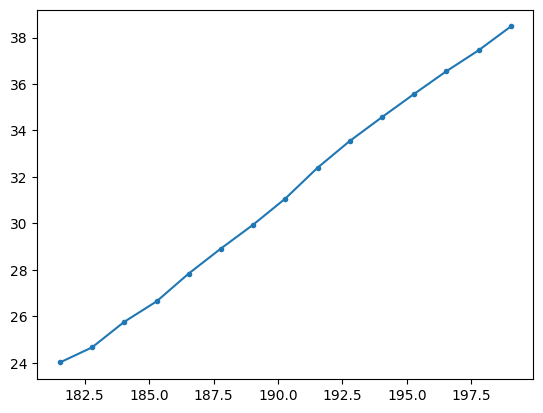

In [115]:
import matplotlib.pyplot as plt
df_plot = df_combined.iloc[1450000:1600000:10000]
plt.plot(df_plot.index,df_plot["ICAI_T_EmStatrTmpMea_Ie"],".-")

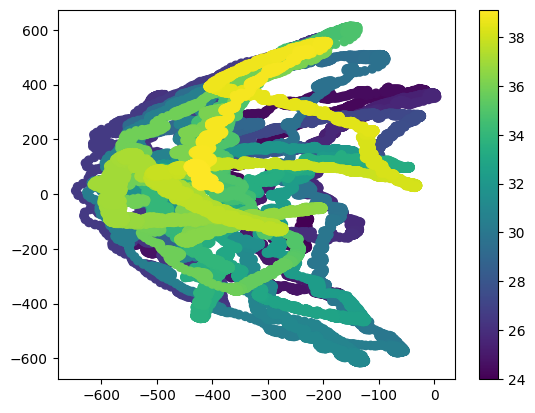

In [164]:
df_scatter = df_combined.iloc[1450000:1600000]
plt.scatter(df_scatter["IQCP_I_IdMeasRaw_Ie"],df_scatter["IQCP_I_IqMeasRaw_Ie"],c=df_scatter["ICAI_T_EmStatrTmpMea_Ie"])
plt.colorbar()

C:\Users\JANLUKS\AppData\Local\Temp\ipykernel_22632\3525157303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_bin'] = (df['IQCP_I_IdMeasRaw_Ie'] // bin_size) * bin_size
C:\Users\JANLUKS\AppData\Local\Temp\ipykernel_22632\3525157303.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_bin'] = (df['IQCP_I_IqMeasRaw_Ie'] // bin_size) * bin_size


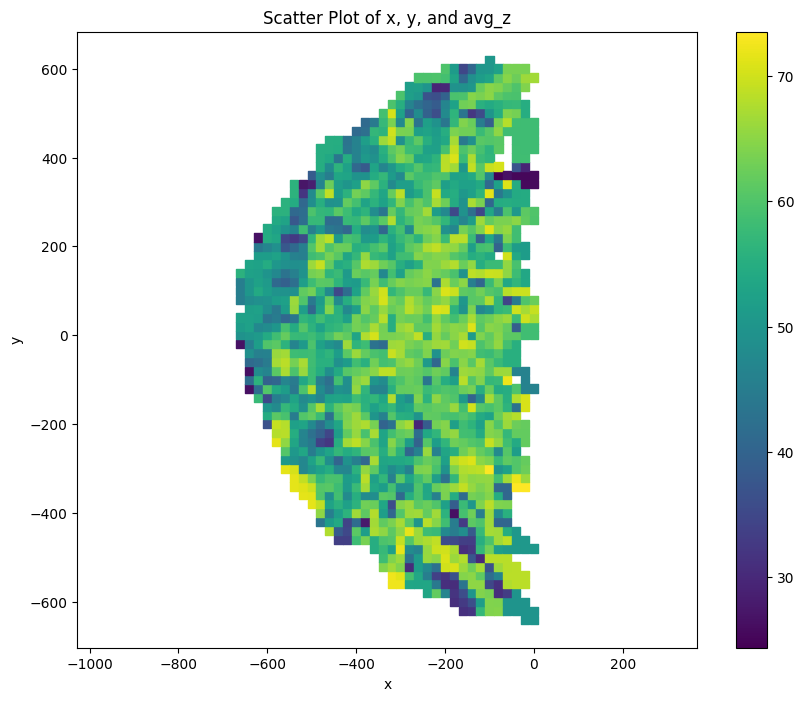

In [39]:

import seaborn as sns
# Definieren Sie die Größe der Rasterzellen
bin_size = 20.0
df = df_combined.iloc[1450000:]
# Gruppieren Sie die x, y-Werte in Rasterzellen und berechnen Sie den durchschnittlichen z-Wert
df['x_bin'] = (df['IQCP_I_IdMeasRaw_Ie'] // bin_size) * bin_size
df['y_bin'] = (df['IQCP_I_IqMeasRaw_Ie'] // bin_size) * bin_size

# Durchschnittlichen z-Wert für jede Rasterzelle berechnen
df_avg = df.groupby(['x_bin', 'y_bin'], as_index=False)['ICAI_T_EmStatrTmpMea_Ie'].mean()
df_avg.rename(columns={'ICAI_T_EmStatrTmpMea_Ie': 'avg_z'}, inplace=True)

# Scatter-Plot mit Seaborn erstellen
plt.figure(figsize=(10, 8))
#sns.scatterplot(data=df_avg, x='x_bin', y='y_bin', hue='avg_z', palette='viridis', legend=None,marker="s")
plt.scatter(df_avg["x_bin"],df_avg["y_bin"],c=df_avg["avg_z"],marker="s")
plt.colorbar()
plt.axis("equal")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x, y, and avg_z')
plt.show()

C:\Users\JANLUKS\AppData\Local\Temp\ipykernel_22632\2832586551.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_bin'] = (df['IQCP_I_IdMeasRaw_Ie'] // bin_size) * bin_size
C:\Users\JANLUKS\AppData\Local\Temp\ipykernel_22632\2832586551.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_bin'] = (df['IQCP_I_IqMeasRaw_Ie'] // bin_size) * bin_size


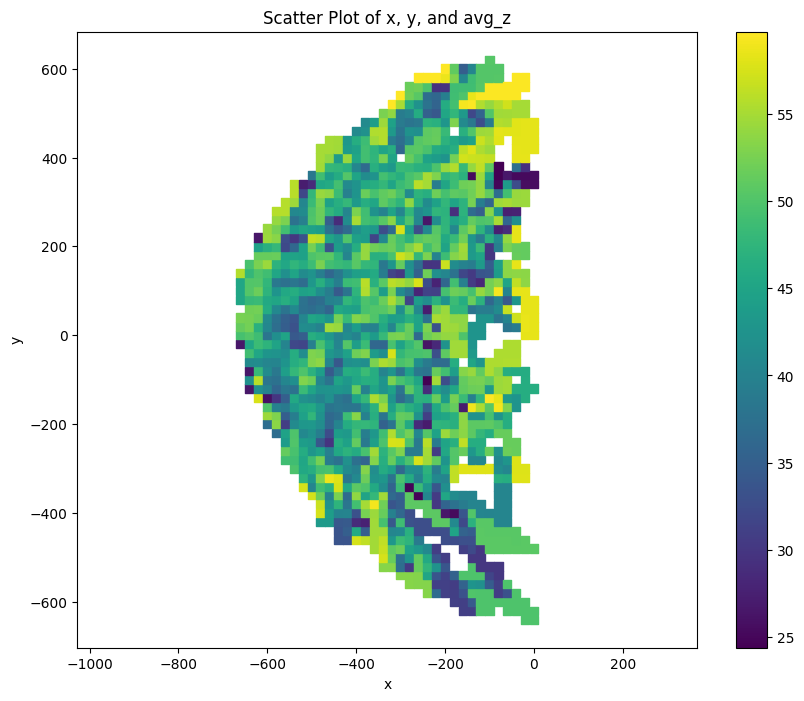

In [41]:
import seaborn as sns
# Definieren Sie die Größe der Rasterzellen
bin_size = 20.0
df = df_combined.iloc[1450000:2000000]
# Gruppieren Sie die x, y-Werte in Rasterzellen und berechnen Sie den durchschnittlichen z-Wert
df['x_bin'] = (df['IQCP_I_IdMeasRaw_Ie'] // bin_size) * bin_size
df['y_bin'] = (df['IQCP_I_IqMeasRaw_Ie'] // bin_size) * bin_size

# Durchschnittlichen z-Wert für jede Rasterzelle berechnen
df_avg = df.groupby(['x_bin', 'y_bin'], as_index=False)['ICAI_T_EmStatrTmpMea_Ie'].mean()
df_avg.rename(columns={'ICAI_T_EmStatrTmpMea_Ie': 'avg_z'}, inplace=True)

# Scatter-Plot mit Seaborn erstellen
plt.figure(figsize=(10, 8))
#sns.scatterplot(data=df_avg, x='x_bin', y='y_bin', hue='avg_z', palette='viridis', legend=None,marker="s")
plt.scatter(df_avg["x_bin"],df_avg["y_bin"],c=df_avg["avg_z"],marker="s")
plt.colorbar()
plt.axis("equal")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x, y, and avg_z')
plt.show()

In [165]:
import pandas as pd
data = pd.read_csv("./data/prüfstand/Rekorder_2025-02-04_11-54-27.csv")
#data = pd.read_csv("./data/prüfstand/measurment with derating.csv")

data.head()
i= np.column_stack((data["IQCP_I_IdMeasRaw_Ie"],data["IQCP_I_IqMeasRaw_Ie"]))
cut_data = data.iloc[1450000:1600000]
cut_data.to_csv("measurement short.csv",index =False)
cut_data.describe()

Time  IQAI_V_VoltNormBase_Ie  IQCC_r_VdCmd_Ie  \
count  150000.000000           150000.000000    150000.000000   
mean      190.911387              406.180834        -0.018709   
std         5.412594                0.536653         0.118966   
min       181.536593              402.469574        -0.206054   
25%       186.223989              405.778168        -0.133055   
50%       190.911386              406.208344        -0.035813   
75%       195.598784              406.618866         0.093640   
max       200.286184              408.797852         0.183574   

       IQCC_r_VqCmd_Ie  IQCP_I_IdMeasRaw_Ie  IQCP_I_IqMeasRaw_Ie  
count    150000.000000        150000.000000        150000.000000  
mean          0.056131          -303.232947            24.469075  
std           0.033667           155.341708           290.268564  
min          -0.083883          -646.336853          -614.699829  
25%           0.029044          -430.857918          -183.243919  
50%           0.057521          -307.749130            35.944269  
75%           0.083071          -180.141678           230.823296  
max           0.143552             3.586573           611.835083

## 2. visualization


(np.float64(-667.44913444519),
 np.float64(81.74945030212402),
 np.float64(-692.2357971191411),
 np.float64(694.8831359863282))

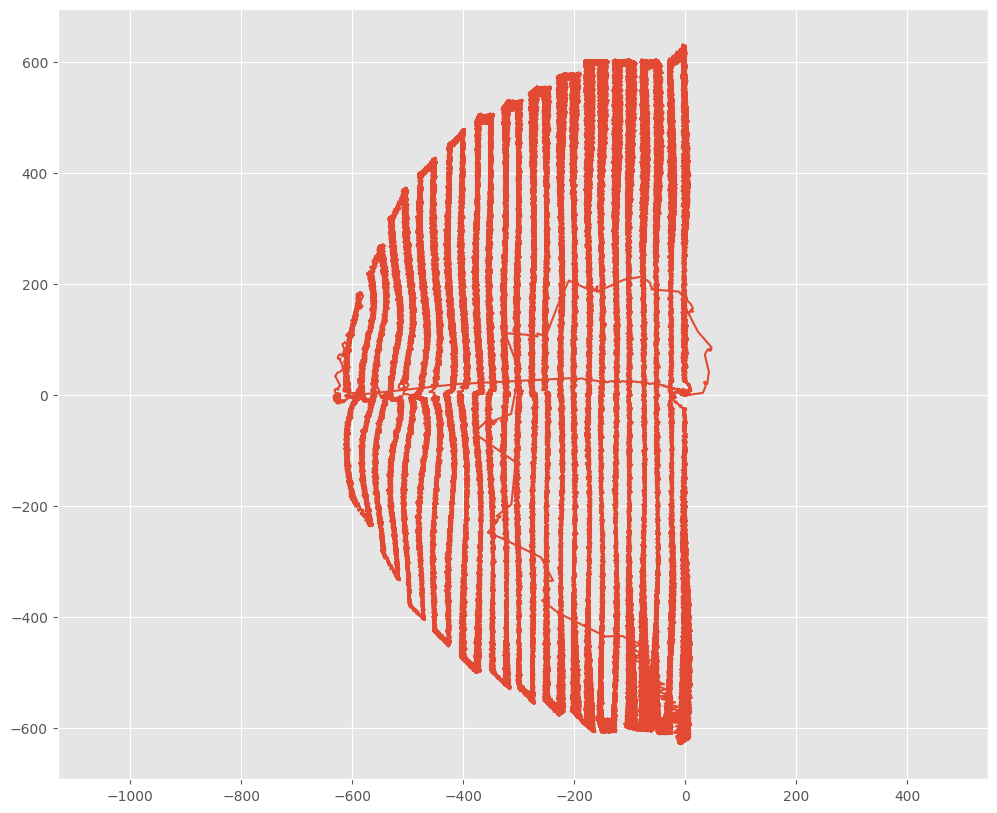

In [195]:
#%matplotlib widget
import matplotlib.pyplot as plt
plot_df = pd.read_csv("./data/prüfstand/Rekorder_2025-02-04_12-25-09.csv").iloc[::10]

plt.figure(figsize=(12,10))

plt.plot(plot_df["IQCP_I_IdMeasRaw_Ie"],plot_df["IQCP_I_IqMeasRaw_Ie"])
plt.axis("equal")
# Plotting the noisy data
#plt.plot(i_noise[start:stop, 0], i_noise[start:stop, 1], "--")
#plt.legend(labels=[data_name,noise_data_name])

<Axes: ylabel='Count'>

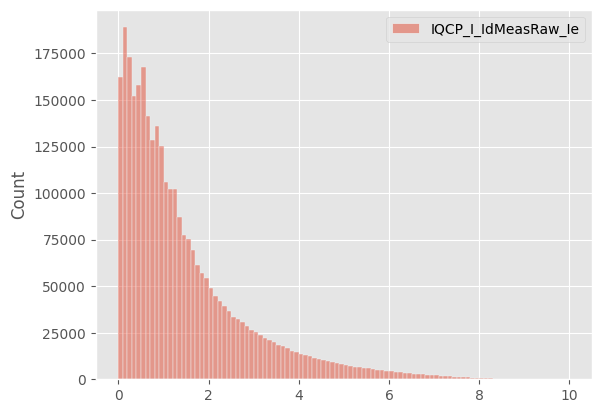

In [197]:
import seaborn as sns
data = pd.read_csv("./data/prüfstand/Rekorder_2025-02-04_12-25-09.csv")
rolling_max = data.rolling(window=2).max()
rolling_min = data.rolling(window=2).min()
delta = np.abs(rolling_max-rolling_min)
sns.histplot(delta[["IQCP_I_IdMeasRaw_Ie"]],bins=100,binrange=(0,10))

(np.float64(-613.9780078887944),
 np.float64(82.21467933654787),
 np.float64(-693.1328277587893),
 np.float64(695.2965850830074))

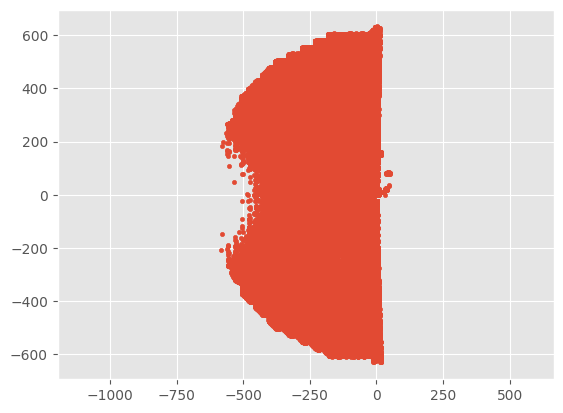

In [200]:
rolling_max_filtered = rolling_max[np.sqrt(np.square(delta["IQCP_I_IdMeasRaw_Ie"]) + np.square(delta["IQCP_I_IqMeasRaw_Ie"]))<2]
plt.scatter(rolling_max_filtered["IQCP_I_IdMeasRaw_Ie"],rolling_max_filtered["IQCP_I_IqMeasRaw_Ie"],marker=".")
plt.axis("equal")

(np.float64(-682.5122541139312),
 np.float64(32.500866665988006),
 np.float64(-666.0716857910159),
 np.float64(656.9515686035159))

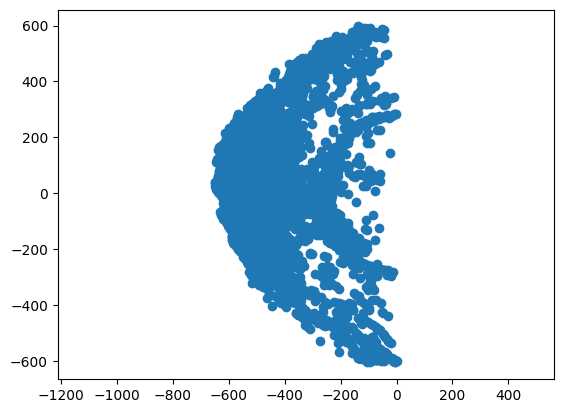

In [163]:
rolling_max_filtered = rolling_max[(delta["IQCP_I_IdMeasRaw_Ie"]>8) | (delta["IQCP_I_IqMeasRaw_Ie"]>8)]
plt.scatter(rolling_max_filtered["IQCP_I_IdMeasRaw_Ie"],rolling_max_filtered["IQCP_I_IqMeasRaw_Ie"])
plt.axis("equal")

In [157]:
import pandas as pd
import numpy as np
import plotly.express as px

animation_data = data.iloc[::10000]
# Create an animated scatter plot
fig = px.scatter(animation_data, x='IQCP_I_IdMeasRaw_Ie', y='IQCP_I_IqMeasRaw_Ie', animation_frame='Time', range_x=[-650,0], range_y=[-650,650])
fig.update_layout(
    xaxis=dict(scaleanchor="y", scaleratio=1),
    yaxis=dict(scaleanchor="x", scaleratio=1)
)
# Show the plot
fig.show()

<Axes: ylabel='Count'>

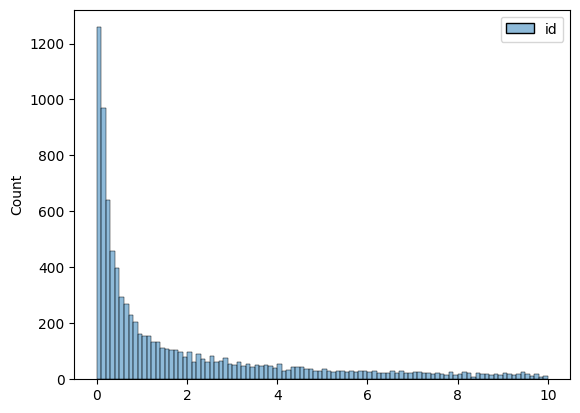

In [151]:
data = pd.read_csv("./data/raw/random_exploration.csv")
rolling_max = data.rolling(window=2).max()
rolling_min = data.rolling(window=2).min()
delta = np.abs(rolling_max-rolling_min)
sns.histplot(delta[["id"]],bins=100,binrange=(0,10))

# plots from old EDA

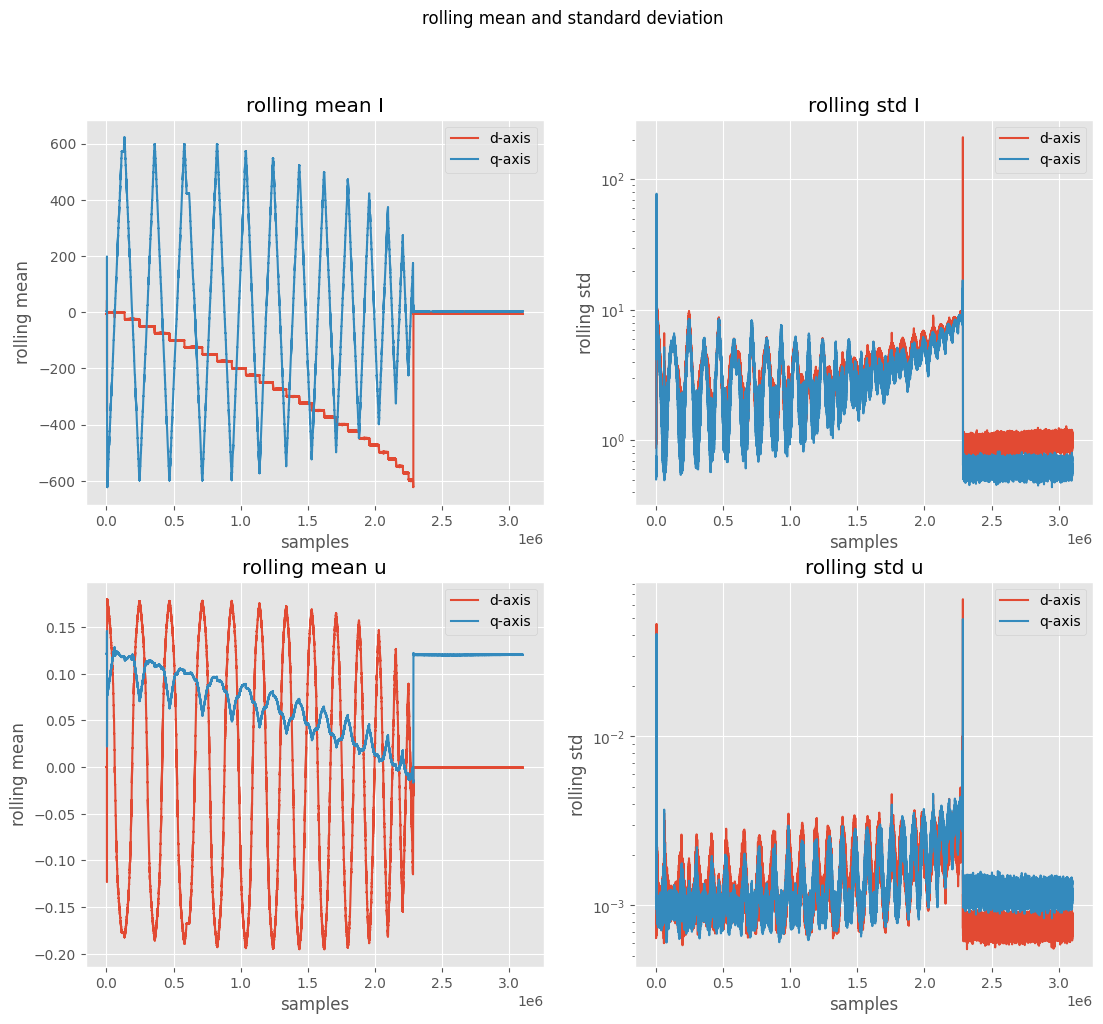

In [193]:
import pandas as pd
data = pd.read_csv("./data/prüfstand/Rekorder_2025-02-04_12-25-09.csv")
rolling_mean = data.rolling(window=100).mean()
rolling_std = data.rolling(window=100).std()
plt.style.use("ggplot")
plt.figure(figsize=(13,11))
plt.subplot(2,2,1)
plt.plot(rolling_mean[["IQCP_I_IdMeasRaw_Ie","IQCP_I_IqMeasRaw_Ie"]])
plt.title("rolling mean I")
plt.xlabel("samples")
plt.ylabel("rolling mean")
plt.legend(["d-axis","q-axis"])

plt.subplot(2,2,2)
plt.semilogy(rolling_std[["IQCP_I_IdMeasRaw_Ie","IQCP_I_IqMeasRaw_Ie"]])
plt.title("rolling std I")
plt.xlabel("samples")
plt.ylabel("rolling std")
plt.legend(["d-axis","q-axis"])

plt.subplot(2,2,3)
plt.plot(rolling_mean[["IQCC_r_VdCmd_Ie","IQCC_r_VqCmd_Ie"]])
plt.title("rolling mean u")
plt.xlabel("samples")
plt.ylabel("rolling mean")
plt.legend(["d-axis","q-axis"])

plt.subplot(2,2,4)
plt.semilogy(rolling_std[["IQCC_r_VdCmd_Ie","IQCC_r_VqCmd_Ie"]])
plt.title("rolling std u")
plt.xlabel("samples")
plt.ylabel("rolling std")
plt.legend(["d-axis","q-axis"])

plt.suptitle("rolling mean and standard deviation")
plt.show()

In [167]:
import torch
from scipy.spatial import Delaunay
import plotly.graph_objects as go
import numpy as np

def log_3d_plot(id:torch.Tensor, iq:torch.Tensor, zs:list, plotnames:list, axislabels:list, title:str) -> None:
    """create a 3d plot with the surfaces in zs and save it as html to mlflow
    Args:
        id (torch.Tensor): _description_
        iq (torch.Tensor): _description_
        zs (list): _description_
        plotnames (list): _description_
        axislabels (list): _description_
        title (str): _description_
        filename (str): _description_
    """
    colors =["yellow","blue"]
    fig = go.Figure()
    points2D = np.vstack([id,iq]).T
    tri = Delaunay(points2D)
    for i,z in enumerate(zs):
        fig.add_trace(
            go.Mesh3d(
                x=id, y=iq, z=z,
                i=tri.simplices[:, 0],
                j=tri.simplices[:, 1],
                k=tri.simplices[:, 2],
                name=plotnames[i],
                colorscale=[[0,colors[i]],[1,colors[i]]],
                showlegend=True,
                showscale=False),
        )

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title=axislabels[0],
            yaxis_title=axislabels[1],
            zaxis_title=axislabels[2]
        )
    )
    return fig

In [169]:
import pandas as pd

file_lwr = "./data/prüfstand/mbinv_psi_lwr_L.csv"
file_upr = "./data/prüfstand/mbinv_psi_upr_L.csv"
df_lwr = pd.read_csv(file_lwr)
df_upr = pd.read_csv(file_upr)
log_3d_plot(df_lwr["id"].values,df_lwr["iq"].values,[df_lwr["psid"].values,df_upr["psid"].values],["lwr","upr"],["id","iq","psi"],"psi")